# Demo Logistic Regression

In [1]:
import numpy as np

In [ ]:
class LogisticRegression :
    def __init__(self,learningrate = 0.01,epochs = 1000 ):
        self.lr = learningrate
        self.epochs = epochs
        self.w = None
        self.b = None
        self.loss_list = []

    def initial (self,n_features:int):
        self.w = np.zeros(n_features)
        self.b = 0


    def sigmoid(self,x):
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))
    
    def get_loss_list(self):
        return self.loss_list
    
    def fit (self,X,Y):
        X = np.array(X)
        Y = np.array(Y)

        if X.ndim == 1:
            X.resize(-1,1)

        len_val, len_fea = X.shape
        self.initial(len_fea)
        for epoch in range(self.epochs):

            Y_hat = np.clip(self.sigmoid(np.dot(X,self.w)+self.b),1e-15,1-1e-15)
            cross_entropy = -np.mean(Y*np.log(Y_hat) + (1-Y)*np.log(1-Y_hat))
            self.loss_list.append(cross_entropy)

            dw = np.dot(X.T,(Y_hat-Y))/ len_val
            db = np.sum(Y_hat-Y) / len_val

            self.w -= self.lr*dw
            self.b -= self.lr*db

    def predict(self,X,threshold = 0.5):
        X = np.array(X)
        Z = np.dot(X,self.w) + self.b
        Y_pred = self.sigmoid(Z)
        return [1 if y_pred >= threshold else 0 for y_pred in Y_pred]
    
    def get_params(self):
        return self.w,self.b
    
    



In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logr_model = LogisticRegression(0.01, 1000,)

logr_model.fit(X_train, y_train)

y_pred = logr_model.predict(X_test, threshold = 0.5)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2%}")

Accuracy: 87.50%


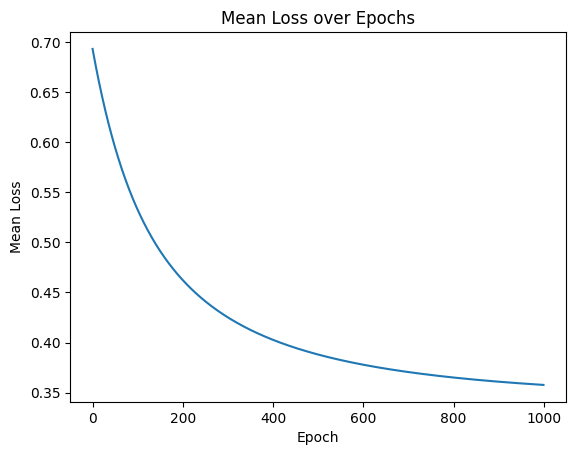

In [4]:
import matplotlib.pyplot as plt
plt.plot(range(1000),logr_model.get_loss_list())
plt.title('Mean Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Loss')
plt.show()

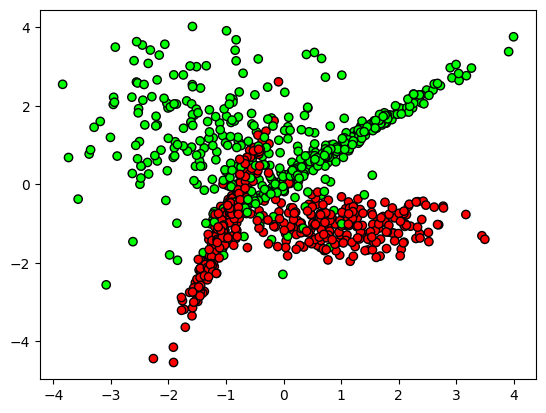

In [5]:
from matplotlib.colors import ListedColormap
plt.scatter(X[:, 0], X[:, 1], c=y,edgecolors='k', cmap=ListedColormap(["#FF0000", "#00FF00"]),);

In [6]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1


In [7]:
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)
xx

array([[-4.83692921, -4.81692921, -4.79692921, ...,  4.94307079,
         4.96307079,  4.98307079],
       [-4.83692921, -4.81692921, -4.79692921, ...,  4.94307079,
         4.96307079,  4.98307079],
       [-4.83692921, -4.81692921, -4.79692921, ...,  4.94307079,
         4.96307079,  4.98307079],
       ...,
       [-4.83692921, -4.81692921, -4.79692921, ...,  4.94307079,
         4.96307079,  4.98307079],
       [-4.83692921, -4.81692921, -4.79692921, ...,  4.94307079,
         4.96307079,  4.98307079],
       [-4.83692921, -4.81692921, -4.79692921, ...,  4.94307079,
         4.96307079,  4.98307079]], shape=(529, 492))

In [8]:
grid = np.c_[xx.ravel(), yy.ravel()]
grid

array([[-4.83692921, -5.54344146],
       [-4.81692921, -5.54344146],
       [-4.79692921, -5.54344146],
       ...,
       [ 4.94307079,  5.01655854],
       [ 4.96307079,  5.01655854],
       [ 4.98307079,  5.01655854]], shape=(260268, 2))

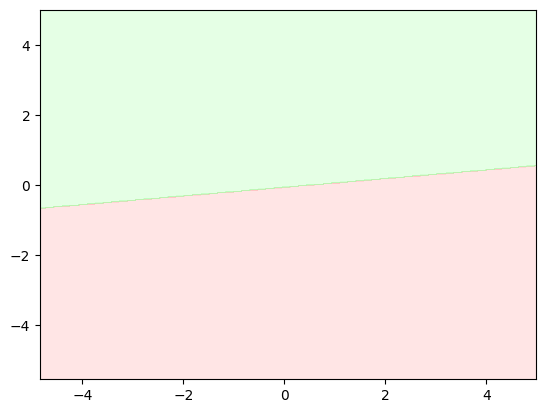

In [9]:
preds = logr_model.predict(grid)
preds = np.array(preds).reshape(xx.shape)

plt.contourf(
    xx, yy, preds, alpha=0.3, cmap=ListedColormap(["#FFAAAA", "#AAFFAA"],)
)

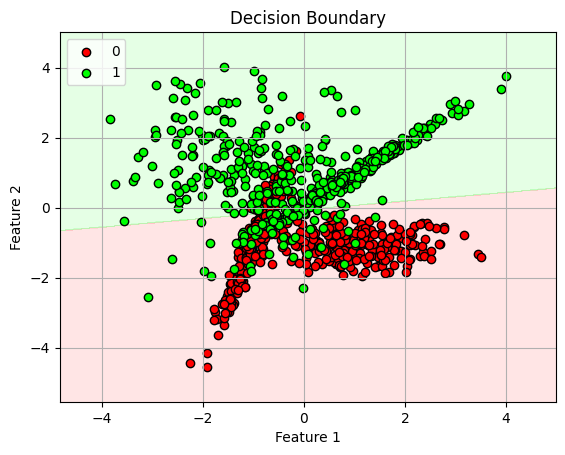

In [10]:
plt.contourf(
    xx, yy, preds, alpha=0.3, cmap=ListedColormap(["#FFAAAA", "#AAFFAA"])
)
plt.scatter(
    X[y == 0, 0],
    X[y == 0, 1],
    color='#FF0000',
    edgecolors="k",
    label='0'
)
plt.scatter(
    X[y == 1, 0],
    X[y == 1, 1],
    color= "#00FF00",
    edgecolors="k",
    label='1'
)
plt.title("Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc='best')
plt.grid(True)
plt.show()